In [74]:
import numpy as np 
import pandas as pd 
import json

In [75]:
kospi = pd.read_csv('./static/data/KOSPI.csv', dtype={'종목코드': str})
kospi.head()

,종목코드,종목명,현재가,대비,등락률(%),매도호가,매수호가,거래량(주),거래대금(원),시가,고가,저가,액면가,통화구분,상장주식수(주),상장시가총액(원),총카운트
0,095570,AJ네트웍스,"4,590",30,0.66,"4,590","4,585","781,237","3,706,015,025","4,735","4,950","4,585","1,000",원(KRW),"46,822,295","214,914,334,050",917.0
1,006840,AK홀딩스,"25,300","-1,250",4.71,"25,450","25,300","106,732","2,718,418,700","26,200","26,200","25,050","5,000",원(KRW),"13,247,561","335,163,293,300",NaN
2,027410,BGF,"4,820",20,0.42,"4,830","4,815","1,089,384","5,252,573,200","4,760","4,885","4,720","1,000",원(KRW),"95,716,791","461,354,932,620",NaN
3,282330,BGF리테일,"129,000","-3,000",2.27,"129,500","129,000","43,637","5,671,121,000","133,500","134,000","128,000","1,000",원(KRW),"17,283,906","2,229,623,874,000",NaN
4,138930,BNK금융지주,"5,830",-10,0.17,"5,840","5,830","1,241,588","7,261,144,190","5,870","5,890","5,810","5,000",원(KRW),"325,935,246","1,900,202,484,180",NaN


In [76]:
kospi = kospi[['종목코드', '종목명']]
kospi.set_index('종목코드', inplace=True)
kospi.tail()

,종목명
종목코드,
069260,휴켐스
000540,흥국화재
000547,흥국화재2우B
000545,흥국화재우
003280,흥아해운


In [77]:
kosdaq = pd.read_csv('./static/data/KOSDAQ.csv', dtype={'종목코드': str})
kosdaq = kosdaq[['종목코드', '종목명']]
kosdaq.set_index('종목코드', inplace=True)
kosdaq.head()

,종목명
종목코드,
060310,3S
054620,APS홀딩스
265520,AP시스템
211270,AP위성
035760,CJ ENM


In [78]:
company = kospi['종목명']['000270']
company

'기아차'

In [79]:
kosdaq_dict = {}
for code in kosdaq.index:
    kosdaq_dict[code] = kosdaq['종목명'][code]

In [80]:
seoulPark = pd.read_csv('./static/data/서울시 공원.csv', index_col= 0)

In [81]:
import folium

In [82]:
map = folium.Map(location=[seoulPark[seoulPark['구별']=='중구']['lat'].mean(),
seoulPark[seoulPark['구별']=='중구']['lng'].mean()], zoom_start=12)
for i in seoulPark[seoulPark['구별']=='중구'].index:
    folium.Marker([seoulPark.lat[i], seoulPark.lng[i]], popup=seoulPark['공원명'][i],
                                tooltip=seoulPark['addr'][i]).add_to(map)
title_html = f'''
                        <h3 align="center" style="font-size:20px"><b>중구의 공원</b></h3>
                        '''
map.get_root().html.add_child(folium.Element(title_html))
map.save('./static/img/junggu.html')

In [83]:
seoulPark.set_index('공원명',inplace=True)

In [84]:
park  = seoulPark.loc['서울숲']

In [85]:
park.lat

37.5430717

In [86]:
geo_str = json.load(open('./static/data/skorea_municipalities_geo_simple.json',
                         encoding='utf8'))

In [87]:
park_gu = pd.read_csv('./static/data/서울시 공원분석.csv', index_col= 0)

In [88]:
park_gu

,인구수,공원의수,공원의면적,오차
구별,,,,
강남구,544085,7,3626398.50,1.622462
강동구,462275,7,1526389.30,1.789225
강북구,313550,4,3714902.40,0.907609
강서구,589536,9,2194154.10,3.529813
관악구,514555,2,10431453.08,3.317344
광진구,361923,2,584002.00,3.006214
구로구,435751,3,1617657.00,2.156707
금천구,249641,4,57568.00,0.777335
노원구,529532,3,12235699.30,2.347873


In [89]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=10, tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
               data = park_gu['공원의수'],
               columns = [park_gu.index, park_gu['공원의수']],
               fill_color = 'PuRd',
               key_on = 'feature.id')
for i in seoulPark.index:
    folium.CircleMarker([seoulPark.lat[i], seoulPark.lng[i]], 
                        radius= seoulPark['면적'][i]*0.000002,
                        tooltip = i,
                        color='green', fill_color='green').add_to(map)

title_html = '<h3 align="center" style="font-size:20px"><b>자치구별 공원수</b></h3>'   
map.get_root().html.add_child(folium.Element(title_html))
map    

In [90]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=10, tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
                       data = (park_gu['공원의면적']/ park_gu['인구수']),
                       columns = [park_gu.index, (park_gu['공원의면적']/ park_gu['인구수'])],
                       fill_color = 'PuRd',
                       key_on = 'feature.id')
map

In [91]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=10, tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
                       data = (park_gu['공원의수']/park_gu['공원의면적']),
columns = [park_gu.index, (park_gu['공원의수']/park_gu['공원의면적'])],fill_color = 'PuRd',      key_on = 'feature.id')
map

In [92]:
park_gu = pd.read_csv('./static/data/서울시 공원분석2.csv')
park_gu.set_index('지역', inplace=True)
df = park_gu[park_gu.index == '강서구'].reset_index()

In [93]:
park_result = {'gu':df['지역'][0], 
                            'area':int(df['공원면적'][0]), 'm_area':int(park_gu['공원면적'].mean()),
                            'count':df['공원수'][0], 'm_count':round(park_gu['공원수'].mean(),1),
                            'area_ratio':round(df['공원면적비율'][0],2), 'm_area_ratio':round(park_gu['공원면적비율'].mean(),2),
                            'per_person':round(df['인당공원면적'][0],2), 'm_per_person':round(park_gu['인당공원면적'].mean(),2)}

In [94]:
df_norm = pd.read_csv('./static/data/서울시5대범죄.csv', index_col=0)

In [95]:
df_norm

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.285714,0.333333,1.000000,1.000000,84.384384,100.000000,60.000000,45.084175,86.358666,544085,5221,0.723810,81.447452
강동구,0.156250,1.000000,0.416667,0.394495,0.385785,86.111111,93.333333,83.333333,54.969697,86.638927,462275,1879,0.470639,87.636658
강북구,0.149306,0.142857,0.416667,0.201376,0.493016,82.386364,66.666667,100.000000,54.027665,91.006601,313550,1265,0.280644,85.404686
강서구,0.375000,0.142857,0.583333,0.577982,0.547658,83.986928,100.000000,100.000000,52.536585,85.881893,589536,1617,0.445366,91.541649
관악구,0.552083,0.642857,1.000000,0.657339,0.595727,82.107843,100.000000,76.923077,48.807917,88.593867,514555,3985,0.689601,85.912971
광진구,0.317708,0.357143,0.250000,0.497706,0.258422,78.021978,83.333333,100.000000,53.760000,85.536967,361923,1581,0.336196,86.827417
구로구,0.236111,0.142857,0.750000,0.516514,0.545604,73.008850,100.000000,90.000000,50.365344,84.169279,435751,3227,0.438217,86.153692
금천구,0.109375,0.642857,0.416667,0.168349,0.228020,82.352941,60.000000,100.000000,53.154710,89.376054,249641,1634,0.313053,83.410128
노원구,0.163194,0.142857,0.250000,0.324771,0.509449,85.869565,100.000000,100.000000,45.460614,85.957792,529532,1906,0.278054,90.432624


In [96]:
tmp_criminal = df_norm['살인'] / df_norm['인구수'] * 1000000

In [97]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles= 'Stamen Toner')
map.choropleth(geo_data = geo_str,
data= tmp_criminal,
columns= [df_norm.index, tmp_criminal],
fill_color= 'PuRd',
key_on='feature.id')
map

In [98]:
# import url
from urllib.parse import urlparse
import requests
# 카카오 키 불러오기
key_fd = open('./과제data/kakaomapkey.txt', mode='r')
kmap_key = key_fd.read(100)
key_fd.close()
p_office_list = [
    '서울강남경찰서', '서울강동경찰서', '서울강북경찰서', '서울강서경찰서',
    '서울관악경찰서', '서울광진경찰서', '서울구로경찰서', '서울금천경찰서',
    '서울남대문경찰서', '서울노원경찰서', '서울도봉경찰서', '서울동대문경찰서',
    '서울동작경찰서', '서울마포경찰서', '서울방배경찰서', '서울서대문경찰서',
    '서울서부경찰서', '서울서초경찰서', '서울성동경찰서', '서울성북경찰서',
    '서울송파경찰서', '서울수서경찰서', '서울양천경찰서', '서울영등포경찰서',
    '서울용산경찰서', '서울은평경찰서', '서울종로경찰서', '서울종암경찰서',
    '서울중랑경찰서', '서울중부경찰서', '서울혜화경찰서'
]
# 검색어로 주소찾기
p_office_list_addr =[]
for p_office in p_office_list:
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query=' + p_office
    result = requests.get(urlparse(url).geturl(),headers={"Authorization": "KakaoAK "+kmap_key}).json()
    p_office_list_addr.append(result['documents'][0]['address_name'])
p_df = pd.DataFrame({
    'name' : p_office_list,
    'addr' : p_office_list_addr
})
lat_list =[] ; lng_list = [] 
for i in range(len(p_office_list_addr)):
    url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + p_office_list_addr[i]
    result = requests.get(urlparse(url).geturl(),headers={"Authorization": "KakaoAK "+kmap_key}).json()
    lat = float(result['documents'][0]['address']['y'])
    lng = float(result['documents'][0]['address']['x'])
    lat_list.append(lat)
    lng_list.append(lng)

p_df['lat'] = lat_list
p_df['lng'] = lng_list

In [99]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
               data = df_norm['검거'],
               columns = [df_norm.index, df_norm['검거']],
               fill_color = 'PuRd',
               key_on = 'feature.id')
for i in p_df.index:
    folium.Marker([p_df.lat[i], p_df.lng[i]], radius=10,
                        tooltip=p_df.name[i],
                        color='#3186cc', fill_color='#3186cc').add_to(map)
map

In [100]:
p_df.to_csv('서울시경찰서.csv')

In [101]:
p_df.head()

,name,addr,lat,lng
0,서울강남경찰서,서울 강남구 대치동 998,37.509230,127.067089
1,서울강동경찰서,서울 강동구 성내동 541-1,37.528683,127.126736
2,서울강북경찰서,서울 강북구 번동 415-15,37.637296,127.027351
3,서울강서경찰서,서울 강서구 화곡동 980-27,37.551278,126.850011
4,서울관악경찰서,서울 관악구 봉천동 1695-5,37.474449,126.951229


In [102]:
a = 'asd_arrest' 

In [103]:
b= 'asdasdsa'

In [104]:
if b.find('_arrest')  :
    print('True')

True


In [105]:
a.find('_arrest')

3

In [106]:
b.find('_arrest')

-1

In [107]:
c_p = pd.read_csv('./static/data/c_p2.csv', index_col=0)

In [108]:
c_p

,ID,커피빈,스타벅스,이디야,빽다방,커피지수,y,x
0,강릉,0,5,15,2,2.333333,3,11
1,정선,0,0,2,0,0.000000,3,10
2,원주,1,10,11,5,6.000000,5,10
3,영월,0,0,0,0,0.000000,7,10
4,태백,0,1,1,0,1.000000,4,10
...,...,...,...,...,...,...,...,...
245,진천,0,1,4,0,0.250000,12,5
246,단양,0,0,1,0,0.000000,11,7
247,옥천,0,0,1,0,0.000000,15,6
248,보은,0,1,2,0,0.500000,13,8


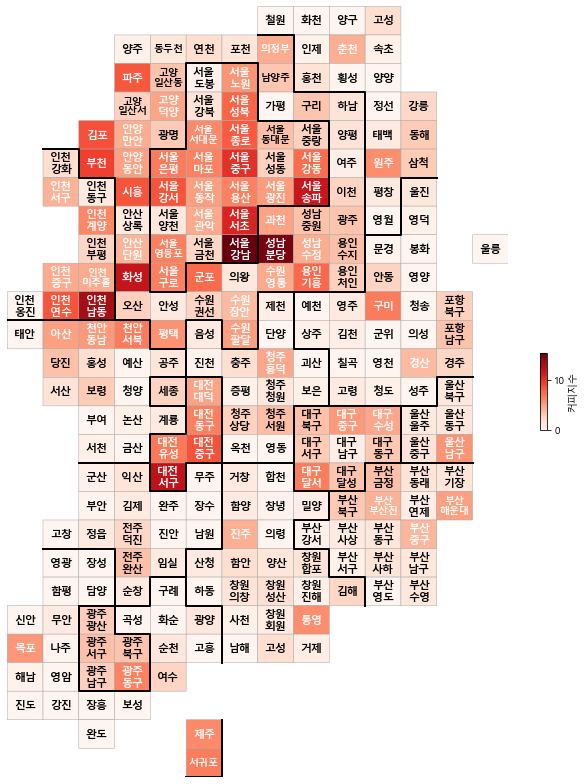

In [109]:
import cartogram.drawkorea as dk
dk.drawKorea('커피지수', c_p, 'Reds')

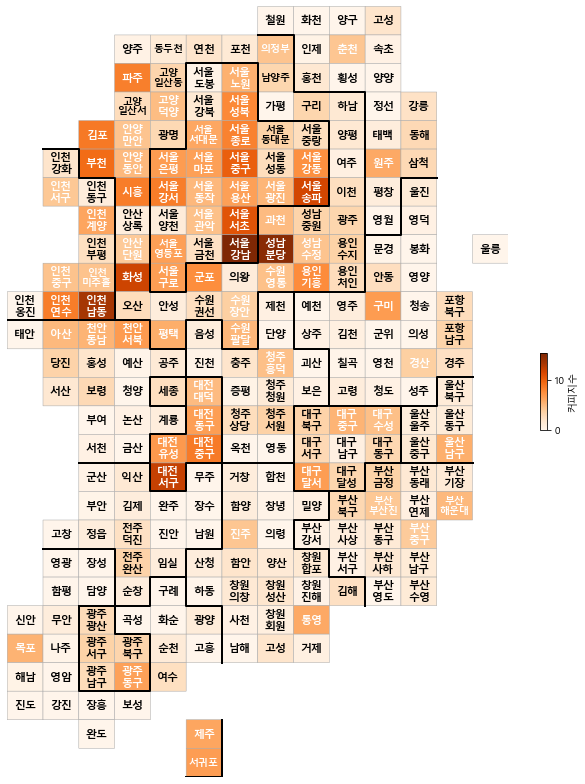

In [110]:
dk.drawKorea('커피지수', c_p, 'Oranges')

In [111]:
a = c_p.sort_values('커피지수',ascending=False).head(10)['ID'].values.tolist()

In [112]:
a

['서울 강남',
 '성남 분당',
 '인천 남동',
 '대전 서구',
 '화성',
 '서울 송파',
 '서울 서초',
 '서울 중구',
 '부천',
 '김포']

In [113]:
pop = pd.read_csv('./static/data/pop.csv', index_col=0)

In [114]:
pop

,광역시도,시도,20~39세여자,20~39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID,y,x,여성비,2030여성비
0,강원,강릉시,20993,46008,40497,101154,101903,203057,1.036768,0,강릉,3,11,0.184431,-4.370979
1,강원,고성군,1699,4006,7005,11933,11688,23621,0.485082,1,고성(강원),0,10,-0.518606,-7.588617
2,강원,동해시,7510,16311,16152,42093,41795,83888,0.929916,1,동해,4,11,-0.177618,-3.957452
3,강원,삼척시,5280,12428,14953,31630,30203,61833,0.706213,1,삼척,5,11,-1.153915,-7.515288
4,강원,속초시,7411,15928,14010,37488,38814,76302,1.057959,0,속초,1,10,0.868916,-3.471873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,충북,충주시,21483,47183,37574,101311,99746,201057,1.143503,0,충주,12,6,-0.389193,-4.468771
246,충북,상당구,19444,39870,25585,82711,85162,167873,1.519953,0,청주 상당,14,6,0.730016,-1.231502
247,충북,서원구,25609,53447,26464,97386,99616,197002,1.935384,0,청주 서원,14,7,0.565984,-2.085243
248,충북,청원구,26880,57755,21908,95997,92726,188723,2.453898,0,청주 청원,13,7,-0.866614,-3.458575


In [115]:
c_p_folium = c_p.set_index('ID')

In [116]:
geo_path = './static/data/all_skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[36.2002, 127.054], zoom_start=7)
map.choropleth(geo_data = geo_data,  
               data = c_p_folium['커피지수'],
               columns= [c_p_folium.index, c_p_folium['커피지수']],
               fill_color= 'YlGnBu',
               key_on='feature.id'
)
map

In [65]:
from DB.db_module import *
import sqlite3

In [60]:
rows = seoul_data()

In [62]:
df = pd.DataFrame(rows, columns=['연번','확진일','지역','접촉력'])

In [64]:
df['지역'].unique()

array(['강서구', '마포구', '중랑구', '종로구', '성북구', '타시도', '송파구', '서대문구', '성동구',
       '강남구', '서초구', '구로구', '강동구', '관악구', '은평구', '노원구', '동작구', '금천구',
       '양천구', '영등포구', '광진구', '동대문구', '도봉구', '용산구', '강북구', '중구', '기타', '',
       '남양주시'], dtype=object)

In [66]:
s_date = '2020-12-12'
e_date = '2020-12-20'

In [67]:
conn = sqlite3.connect('./DB/covid-19.db')
cur = conn.cursor()
cur.execute(f'''select * from "서울시 확진자 현황 where( "확진일" >= "{s_date}") and ("확진일" <= "{e_date}")"''')
rows = cur.fetchall()
conn.close()

OperationalError: near "" >= "": syntax error